Dependencies

In [34]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

Read data

## Read one file

In [2]:
df = pd.read_csv('../supermappen/Tabell15A_Gymbas2000.csv', encoding='latin1', sep=';',header=2)

What do we have?

In [3]:
df.head(10)

,Basområde,Kvinna = 2,Behöriga,Totalt
0,1010110,1,0,0
1,1010130,1,0,0
2,1010130,2,4,4
3,1010140,1,0,0
4,1010140,2,7,7
5,1010201,2,0,0
6,1010220,2,0,0
7,1010230,1,0,0
8,1010240,1,0,0
9,1010290,2,0,0


Rename `Kvinna = 2` to `Kön`

In [4]:
df.columns.values[1]
# df.rename(columns={df.columns.values[1]: "Kön"})
df = df.rename(columns={"Kvinna = 2": "Kön"})
df.head(1)

,Basområde,Kön,Behöriga,Totalt
0,1010110,1,0,0


Change `Kön` codes to `Kvinna/Man`

In [5]:
df['Kön'] = df['Kön'].astype('category')
df['Kön'].cat.categories = ['Man', 'Kvinna']
df['Kön'].cat.categories

Index(['Man', 'Kvinna'], dtype='object')

## Read many files

Get list of all files in folder matching pattern

In [6]:
allfiles = glob.glob('../supermappen/*Gymbas*.csv')
allfiles

['../supermappen/Tabell15A_Gymbas2002.csv',
 '../supermappen/Tabell15A_Gymbas2016.csv',
 '../supermappen/Tabell15A_Gymbas2012.csv',
 '../supermappen/Tabell15A_Gymbas2000.csv',
 '../supermappen/Tabell15A_Gymbas2003.csv',
 '../supermappen/Tabell15A_Gymbas2006.csv',
 '../supermappen/Tabell15A_Gymbas2011.csv',
 '../supermappen/Tabell15A_Gymbas2010.csv',
 '../supermappen/Tabell15A_Gymbas2008.csv',
 '../supermappen/Tabell15A_Gymbas2014.csv',
 '../supermappen/Tabell15A_Gymbas2005.csv',
 '../supermappen/Tabell15A_Gymbas2009.csv',
 '../supermappen/Tabell15A_Gymbas2017.csv',
 '../supermappen/Tabell15A_Gymbas2013.csv',
 '../supermappen/Tabell15A_Gymbas2004.csv',
 '../supermappen/Tabell15A_Gymbas2015.csv',
 '../supermappen/Tabell15A_Gymbas2007.csv',
 '../supermappen/Tabell15A_Gymbas2001.csv']

Function to get the year out of the filename

In [7]:
# getYear = lambda x: x[-8:-4]
def getYear(fileName):
    return fileName[-8:-4]

Test getYear function

In [8]:
list(map(getYear, allfiles))

['2002',
 '2016',
 '2012',
 '2000',
 '2003',
 '2006',
 '2011',
 '2010',
 '2008',
 '2014',
 '2005',
 '2009',
 '2017',
 '2013',
 '2004',
 '2015',
 '2007',
 '2001']

Function for loading and parsing each file

In [170]:
def loadFile(file):
    # Read the file
    df = pd.read_csv(file, encoding='latin1',sep=';',header=2)
    # Get the year from the filename
    df['year'] = pd.to_datetime(getYear(file))
    # Rename column
    df = df.rename(columns={"Kvinna = 2": "Kön"})
    # Give names to categories
    df['Kön'] = df['Kön'].astype('category')
    df['Kön'].cat.categories = ['male', 'female']
    # Set index
    df = df.set_index(['year'])
    return df

Load all files

In [171]:
dfs = list(map(loadFile, allfiles))

In [172]:
dfs[0].index

DatetimeIndex(['2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-01',
               ...
               '2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-01', '2002-01-01', '2002-01-01',
               '2002-01-01', '2002-01-01'],
              dtype='datetime64[ns]', name='year', length=2051, freq=None)

In [173]:
dfs[0]

,Basområde,Kön,Behöriga,Totalt
year,,,,
2002-01-01,1010120,male,0,0
2002-01-01,1010120,female,0,0
2002-01-01,1010130,male,8,8
2002-01-01,1010130,female,4,4
2002-01-01,1010140,male,0,0
2002-01-01,1010140,female,5,5
2002-01-01,1010230,male,0,0
2002-01-01,1010240,male,0,0
2002-01-01,1010240,female,0,0


### Merge all read files

In [174]:
df = pd.concat(dfs)

--------

## Plot time siries for a single Basområde

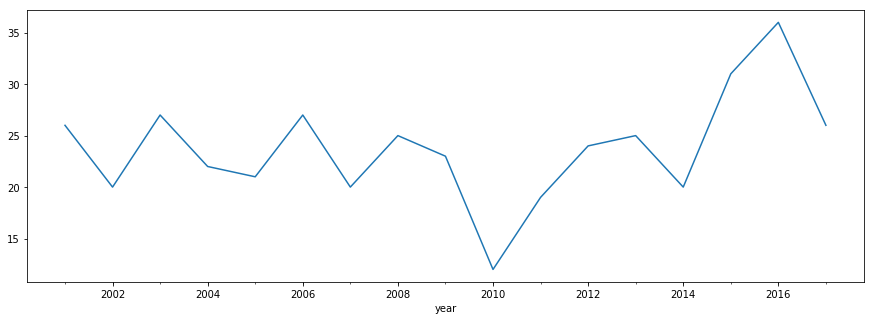

In [175]:
df[(df['Kön'] == 'female') & (df['Basområde'] == 6341451)].sort_index()['Behöriga'].plot()

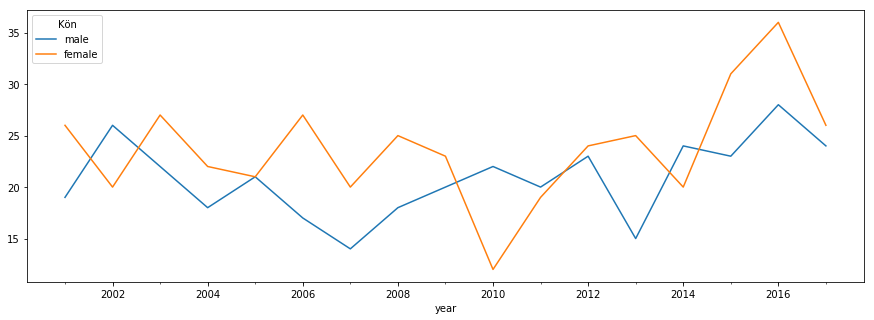

In [176]:
df[df['Basområde'] == 6341451].pivot(columns='Kön', values='Behöriga').plot()

------

## Export as ddf-csv

In [184]:
def export(gender):
    gen = df[df['Kön'] == gender]
    gen = gen.reset_index().rename(columns={'Behöriga': gender, 'Basområde': 'basomrade'})
    gen = gen.drop('Kön', 1)
    gen['year'] = gen['year'].apply(lambda t: t.year)
    gen = gen[['basomrade', 'year', gender]]
    gen.to_csv('ddf--datapoints--gymbas-{gender}-by-basomrade-year.csv'.format(gender=gender), index=False)

In [185]:
genders = pd.unique(df['Kön'])
for gender in genders: export(gender)

------